# Project results


In [1]:
import sys
sys.path.append("../..")
from src import convex_return_mapping as crm # there is a conflict in the order of imported modules
from src import plasticity_framework as pf

from mpi4py import MPI

import matplotlib.pyplot as plt
import numpy as np
import logging

In [2]:
def plot_dsiplacement(results):
    plt.plot(results[:, 0], results[:, 1], "-o")
    plt.title("Displacement of inner boundary")
    plt.ylabel(r"Applied pressure $q/q_{lim}$")
    plt.xlabel(r"$u_x(R_i,0)$")

## Logging

In [3]:
logger = logging.getLogger('log')
logger.setLevel(logging.INFO)
logger.setLevel(pf.LOG_INFO_STAR)
# logger.setLevel(logging.WARNING)

logger_file = logging.getLogger('log_file')
logger_file.setLevel(logging.DEBUG)
# logger_file.setLevel(logging.INFO)
logger_file.setLevel(pf.LOG_INFO_STAR)
fh = logging.FileHandler("log/project_results.log", mode='a')
logger_file.addHandler(fh)

## Defining elastoplastic materials

In [4]:
Pa_dim = 70e3
E = 70e3 / Pa_dim #[-]
nu = 0.3 #[-]
Et = E/100.  # tangent modulus
H = E*Et/(E-Et)  # hardening modulus

sig0 = 250 / Pa_dim #[-]
sigt = 250 / Pa_dim
sigc = 250 / Pa_dim

alpha = 0.5

vonMises = crm.vonMises(sig0, H)
DruckerPrager = crm.DruckerPrager(sig0, alpha, H)
Rankine = crm.Rankine(sigt, sigc, H)

material_vM = crm.Material(crm.IsotropicElasticity(E, nu), vonMises)
material_DP = crm.Material(crm.IsotropicElasticity(E, nu), DruckerPrager)
material_Rankine = crm.Material(crm.IsotropicElasticity(E, nu), Rankine)

## Compact classes

Level 25:log:rank#0: mesh = ../mesh/thick_cylinder_coarse.msh
Level 25:log:rank#0: mesh info: 50 nodes (global), 69 cells (global), 207 quadrature_points (Q2 space) (global)
Level 25:log:rank#0: mesh info: 50 nodes (local), 69 cells (local), 207 quadrature_points (Q2 space) (local)
Level 25:log:rank#0: Step: 1, Iterations = 1, Time = 0.01 (s)
Level 25:log:rank#0: Step: 2, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 3, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 4, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 5, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 6, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 7, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 8, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 9, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 10, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 11, Iterations = 1, Time = 0.00 (s)
Level 25:log:rank#0: Step: 12, It

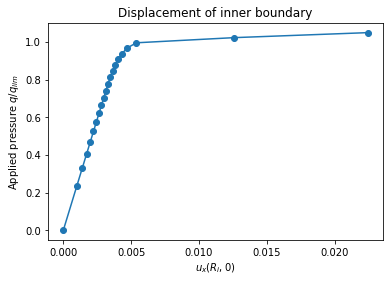

In [6]:
vonMises_plasticity = pf.vonMisesPlasticity(
    material=material_vM, 
    logger=logger, 
    solver='SNESQN', 
    mesh_name="../mesh/thick_cylinder_coarse.msh"
)
points_on_proc, results, total_time, sig, p, u, niters = vonMises_plasticity.solve()
plot_dsiplacement(results)

Level 25:log:rank#0: mesh = ../mesh/thick_cylinder.msh
Level 25:log:rank#0: mesh info: 811 nodes (global), 1478 cells (global), 4434 quadrature_points (Q2 space) (global)
Level 25:log:rank#0: mesh info: 811 nodes (local), 1478 cells (local), 4434 quadrature_points (Q2 space) (local)


Level 25:log:rank#0: Step: 1, Iterations = 1, Time = 0.15 (s)
Level 25:log:rank#0: Step: 2, Iterations = 1, Time = 0.12 (s)
Level 25:log:rank#0: Step: 3, Iterations = 1, Time = 0.11 (s)
Level 25:log:rank#0: Step: 4, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 5, Iterations = 1, Time = 0.09 (s)
Level 25:log:rank#0: Step: 6, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 7, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 8, Iterations = 1, Time = 0.11 (s)
Level 25:log:rank#0: Step: 9, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 10, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 11, Iterations = 4, Time = 0.35 (s)
Level 25:log:rank#0: Step: 12, Iterations = 4, Time = 0.35 (s)
Level 25:log:rank#0: Step: 13, Iterations = 4, Time = 0.34 (s)
Level 25:log:rank#0: Step: 14, Iterations = 5, Time = 0.35 (s)
Level 25:log:rank#0: Step: 15, Iterations = 4, Time = 0.30 (s)
Level 25:log:rank#0: Step: 16, Iterations = 5, Time = 0.36 (s)
L

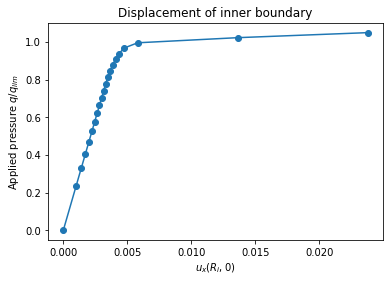

In [10]:
logger.setLevel(pf.LOG_INFO_TIME_ONLY)

vonMises_plasticity = pf.vonMisesPlasticity(
    material=material_vM, 
    logger=logger, 
    solver='nonlinear', 
    mesh_name="../mesh/thick_cylinder.msh"
)
points_on_proc, results, total_time, sig, p, u, niters = vonMises_plasticity.solve()
plot_dsiplacement(results)

Level 26:log:rank#0: Iterations number of last loading step = 7
Level 26:log:rank#0: Time (total) = 1.51 (s)



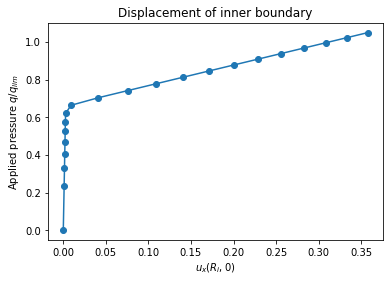

In [7]:
logger.setLevel(pf.LOG_INFO_TIME_ONLY)

DruckerPrager_plasticity = pf.DruckerPragerPlasticity(
    material=material_DP, 
    logger=logger, 
    solver='SNESQN', 
    mesh_name="../mesh/thick_cylinder_coarse.msh"
)
points_on_proc, results, total_time, sig, p, u, niters = DruckerPrager_plasticity.solve()
plot_dsiplacement(results)

In [8]:
logger.setLevel(pf.LOG_INFO_STAR)

Rankine_convex_plasticity = pf.ConvexPlasticity(
    material=material_Rankine, 
    logger=logger, 
    solver='SNESQN', 
    mesh_name="../mesh/thick_cylinder_coarse.msh", 
    patch_size=100,
    conic_solver='SCS'
)
points_on_proc, results, total_time, sig, p, u, niters = Rankine_convex_plasticity.solve()
plot_dsiplacement(results)

Level 25:log:rank#0: mesh = ../mesh/thick_cylinder_coarse.msh
Level 25:log:rank#0: mesh info: 50 nodes (global), 69 cells (global), 207 quadrature_points (Q2 space) (global)
Level 25:log:rank#0: mesh info: 50 nodes (local), 69 cells (local), 207 quadrature_points (Q2 space) (local)
Level 25:log:rank#0: Newton solver = SNESQN, conic solver = SCS, patch size = 100


Level 25:log:rank#0: Step: 1, Iterations = 1, Time = 3.88 (s)


Failure:interrupted


SolverError: Solver 'SCS' failed. Try another solver, or solve with verbose=True for more information.

In [7]:
# plasticity_DP = pf.DruckerPragerPlasticity(material_DP, logger=logger, solver='SNESQN', mesh_name="thick_cylinder_coarse.msh")
# plasticity_convex_analytical_DP = pf.ConvexAnalyticalPlasticity(material_DP, logger=logger_file, solver='SNESQN', mesh_name="thick_cylinder_coarse.msh", patch_size=10, conic_solver='SCS')
# plasticity_convex_DP = pf.ConvexPlasticity(material_DP, logger=logger, solver='SNESQN', mesh_name="mesh/thick_cylinder_coarse.msh", patch_size=100)

Level 25:analysis:rank#0: mesh = mesh/thick_cylinder_coarse.msh
Level 25:analysis:rank#0: mesh info: 50 nodes (global), 69 cells (global), 207 quadrature_points (Q2 space) (global)
Level 25:analysis:rank#0: mesh info: 50 nodes (local), 69 cells (local), 207 quadrature_points (Q2 space) (local)
Level 25:analysis:rank#0: Newton solver = SNESQN, conic solver = SCS, patch size = 100


## Results

### Qualitative yield criteria comparison

In [46]:
vonMises = crm.vonMises(sig0, H)
Rankine = crm.Rankine(sigt, sigc, H)
material_vM = crm.Material(crm.IsotropicElasticity(E, nu), vonMises)
material_Rankine = crm.Material(crm.IsotropicElasticity(E, nu), Rankine)

logger_file.setLevel(pf.LOG_INFO_TIME_ONLY)

plasticity_vM = pf.vonMisesPlasticity(
    material=material_vM, 
    logger=logger_file, 
    solver='nonlinear',
    mesh_name="../mesh/thick_cylinder_coarse.msh"
)

plasticity_Rankine = pf.ConvexPlasticity(
    material=material_Rankine, 
    logger=logger_file, 
    solver='SNESQN', 
    mesh_name="../mesh/thick_cylinder_coarse.msh", 
    patch_size=100, 
    conic_solver='SCS'
)

results = []

In [47]:
_, result_vM, _, _, _, _, _ = plasticity_vM.solve()
results.append(result_vM)

Level 26:log_file:rank#0: Time (total) = 2.51 (s)



In [48]:
_, result_Rankine, _, _, _, _, _ = plasticity_Rankine.solve()
results.append(result_Rankine)

Level 26:log_file:rank#0: Time (total) = 55.41 (s)



In [49]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.7, 1, 1.1, 1.3, 1.5, 2]
for alpha in alphas:
    DruckerPrager = crm.DruckerPrager(sig0, alpha, H)
    material_DP = crm.Material(crm.IsotropicElasticity(E, nu), DruckerPrager)
    plasticity_DP = pf.DruckerPragerPlasticity(
        material=material_DP, 
        logger=logger_file, 
        solver='nonlinear', 
        mesh_name="../mesh/thick_cylinder_coarse.msh"
    )
    _, result_DP, _, _, _, _, _ = plasticity_DP.solve()
    results.append(result_DP)

Level 26:log_file:rank#0: Time (total) = 3.03 (s)



Level 26:log_file:rank#0: Time (total) = 2.93 (s)



Level 26:log_file:rank#0: Time (total) = 2.93 (s)



Level 26:log_file:rank#0: Time (total) = 4.39 (s)



Level 26:log_file:rank#0: Time (total) = 4.25 (s)



Level 26:log_file:rank#0: Time (total) = 4.67 (s)



Level 26:log_file:rank#0: Time (total) = 3.73 (s)



Level 26:log_file:rank#0: Time (total) = 3.64 (s)



Level 26:log_file:rank#0: Time (total) = 5.44 (s)



Level 26:log_file:rank#0: Time (total) = 2.94 (s)



Text(0.5, 1.0, 'Drucker-Prager criterion for different values of $\\alpha$')

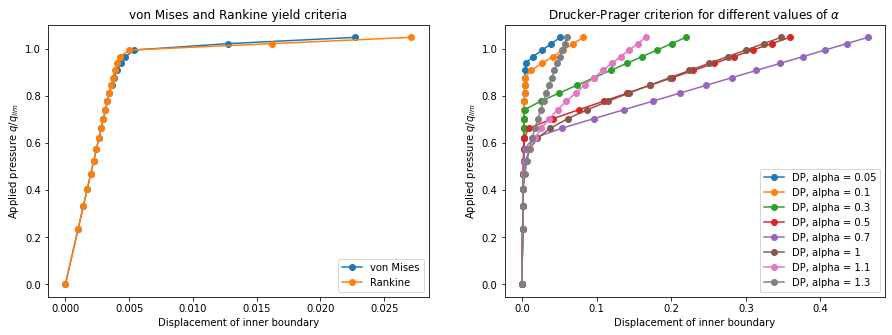

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plt.title('Different yield criterions')
ax[0].plot(results[0][:,0], results[0][:,1], "-o", label='von Mises')
ax[0].plot(results[1][:,0], results[1][:,1], "-o", label='Rankine')

for i, alpha in enumerate(alphas[:-2]):
    ax[1].plot(results[i+2][:,0], results[i+2][:,1], "-o", label=f'DP, alpha = {alpha}')

for i in range(2):
    ax[i].set_xlabel("Displacement of inner boundary")
    ax[i].set_ylabel(r"Applied pressure $q/q_{lim}$")
    ax[i].legend()
ax[0].set_title('von Mises and Rankine yield criteria')
ax[1].set_title(r'Drucker-Prager criterion for different values of $\alpha$')
# plt.savefig("img/yield_criterions.png", dpi=300)

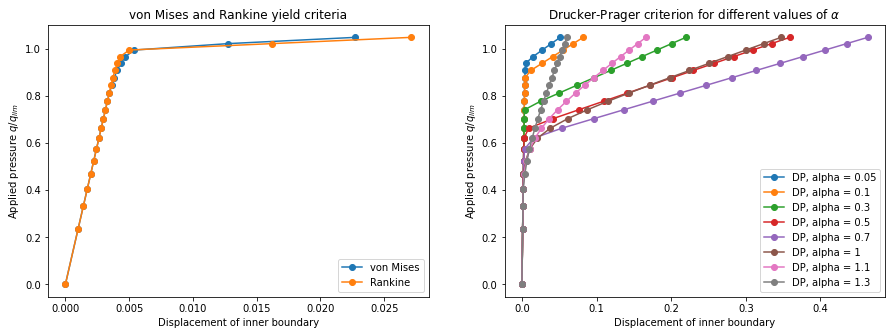

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plt.title('Different yield criterions')
ax[0].plot(results[0][:,0], results[0][:,1], "-o", label='von Mises')
ax[0].plot(results[1][:,0], results[1][:,1], "-o", label='Rankine')

for i, alpha in enumerate(alphas[:-2]):
    ax[1].plot(results[i+2][:,0], results[i+2][:,1], "-o", label=f'DP, alpha = {alpha}')

for i in range(2):
    ax[i].set_xlabel("Displacement of inner boundary")
    ax[i].set_ylabel(r"Applied pressure $q/q_{lim}$")
    ax[i].legend()
ax[0].set_title('von Mises and Rankine yield criteria')
ax[1].set_title(r'Drucker-Prager criterion for different values of $\alpha$')
plt.savefig("img/yield_criterions.png", dpi=300)

### Convex plasticity approach: `derivative()` from cvxpy vs quasi-Newton approximation 

In [25]:
vonMises_convex_plasticity_SNESQN = pf.ConvexPlasticity(
    material=material_vM, 
    logger=logger, 
    solver='SNESQN', 
    mesh_name="../mesh/thick_cylinder_coarse.msh", 
    patch_size=100,
    conic_solver='SCS'
)

vonMises_convex_plasticity_cvxpy = pf.ConvexPlasticity(
    material=material_vM, 
    logger=logger, 
    solver='nonlinear', 
    mesh_name="../mesh/thick_cylinder_coarse.msh", 
    patch_size=100,
    conic_solver='SCS'
)

Level 25:log:rank#0: mesh = ../mesh/thick_cylinder_coarse.msh
Level 25:log:rank#0: mesh info: 50 nodes (global), 69 cells (global), 207 quadrature_points (Q2 space) (global)
Level 25:log:rank#0: mesh info: 50 nodes (local), 69 cells (local), 207 quadrature_points (Q2 space) (local)
Level 25:log:rank#0: Newton solver = SNESQN, conic solver = SCS, patch size = 100
Level 25:log:rank#0: mesh = ../mesh/thick_cylinder_coarse.msh
Level 25:log:rank#0: mesh info: 50 nodes (global), 69 cells (global), 207 quadrature_points (Q2 space) (global)
Level 25:log:rank#0: mesh info: 50 nodes (local), 69 cells (local), 207 quadrature_points (Q2 space) (local)
Level 25:log:rank#0: Newton solver = nonlinear, conic solver = SCS, patch size = 100


In [23]:
logger.setLevel(pf.LOG_INFO_STAR)
_, _, total_time_SNESQN, _, _, _, _ = vonMises_convex_plasticity_SNESQN.solve()

Level 25:log:rank#0: Step: 1, Iterations = 1, Time = 0.19 (s)
Level 25:log:rank#0: Step: 2, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 3, Iterations = 1, Time = 0.11 (s)
Level 25:log:rank#0: Step: 4, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 5, Iterations = 1, Time = 0.10 (s)
Level 25:log:rank#0: Step: 6, Iterations = 1, Time = 0.11 (s)
Level 25:log:rank#0: Step: 7, Iterations = 1, Time = 0.09 (s)
Level 25:log:rank#0: Step: 8, Iterations = 1, Time = 0.09 (s)
Level 25:log:rank#0: Step: 9, Iterations = 1, Time = 0.07 (s)
Level 25:log:rank#0: Step: 10, Iterations = 1, Time = 0.08 (s)
Level 25:log:rank#0: Step: 11, Iterations = 1, Time = 0.09 (s)
Level 25:log:rank#0: Step: 12, Iterations = 8, Time = 0.39 (s)
Level 25:log:rank#0: Step: 13, Iterations = 12, Time = 0.61 (s)
Level 25:log:rank#0: Step: 14, Iterations = 13, Time = 0.65 (s)
Level 25:log:rank#0: Step: 15, Iterations = 12, Time = 0.58 (s)
Level 25:log:rank#0: Step: 16, Iterations = 19, Time = 0.91 (

In [26]:
logger.setLevel(pf.LOG_INFO_STAR)
_, _, total_time_cvxpy, _, _, _, _ = vonMises_convex_plasticity_cvxpy.solve()

Level 25:log:rank#0: Step: 1, Iterations = 1, Time = 2.87 (s)
Level 25:log:rank#0: Step: 2, Iterations = 1, Time = 2.81 (s)
Level 25:log:rank#0: Step: 3, Iterations = 1, Time = 2.78 (s)
Level 25:log:rank#0: Step: 4, Iterations = 1, Time = 3.14 (s)
Level 25:log:rank#0: Step: 5, Iterations = 1, Time = 2.94 (s)
Level 25:log:rank#0: Step: 6, Iterations = 1, Time = 3.22 (s)
Level 25:log:rank#0: Step: 7, Iterations = 1, Time = 2.84 (s)
Level 25:log:rank#0: Step: 8, Iterations = 1, Time = 2.82 (s)
Level 25:log:rank#0: Step: 9, Iterations = 1, Time = 2.80 (s)
Level 25:log:rank#0: Step: 10, Iterations = 1, Time = 2.57 (s)
Level 25:log:rank#0: Step: 11, Iterations = 1, Time = 2.86 (s)
Level 25:log:rank#0: Step: 12, Iterations = 4, Time = 14.81 (s)
Level 25:log:rank#0: Step: 13, Iterations = 4, Time = 17.13 (s)
Level 25:log:rank#0: Step: 14, Iterations = 4, Time = 16.95 (s)
Level 25:log:rank#0: Step: 15, Iterations = 4, Time = 20.00 (s)
Level 25:log:rank#0: Step: 16, Iterations = 4, Time = 18.55 

In [35]:
print(f'Total time of modeling, when the stress tensor derivative is approximated: \
      \n\tusing quasi-Newton method: {round(total_time_SNESQN, 2)} (s) \
      \n\tusing derivative() function of cvxpy library: {round(total_time_cvxpy, 2)} (s)'
)

Total time of modeling, when the stress tensor derivative is approximated:       
	using quasi-Newton method: 13.21 (s)       
	using derivative() function of cvxpy library: 246.3 (s)


### Newton vs Quasi-Newton

In [9]:
vonMises = crm.vonMises(sig0, H)
material_vM = crm.Material(crm.IsotropicElasticity(E, nu), vonMises)
solvers = ['SNES', 'SNESQN']
results = {
    'time SNES': np.zeros(5),
    'time SNESQN': np.zeros(5),
    'niters SNES': np.zeros(5),
    'niters SNESQN': np.zeros(5),      
}
for solver in solvers:
    for i in range(5):
        logger_file.log(pf.LOG_INFO_TIME_ONLY, f'solver = {solver}')
        logger_file.setLevel(pf.LOG_INFO_TIME_ONLY)
        plasticity_vM = pf.vonMisesPlasticity(
            material=material_vM, 
            logger=logger_file, 
            solver=solver, 
            mesh_name="../../custom_assembling/mesh/thick_cylinder_" + str(i+1) + ".msh"
        )
        _, _, total_time, _, _, _, niters = plasticity_vM.solve()
        results['time ' + solver][i] = total_time
        results['niters ' + solver][i] = niters


Level 26:log_file:solver = SNES


Level 26:log_file:rank#0: Iterations number of last loading step = 4
Level 26:log_file:rank#0: Time (total) = 0.74 (s)

Level 26:log_file:solver = SNES


Level 26:log_file:rank#0: Iterations number of last loading step = 4
Level 26:log_file:rank#0: Time (total) = 3.11 (s)

Level 26:log_file:solver = SNES


Level 26:log_file:rank#0: Iterations number of last loading step = 4
Level 26:log_file:rank#0: Time (total) = 15.98 (s)

Level 26:log_file:solver = SNES


Level 26:log_file:rank#0: Iterations number of last loading step = 4
Level 26:log_file:rank#0: Time (total) = 60.56 (s)

Level 26:log_file:solver = SNES


Level 26:log_file:rank#0: Iterations number of last loading step = 4
Level 26:log_file:rank#0: Time (total) = 188.11 (s)

Level 26:log_file:solver = SNESQN


Level 26:log_file:rank#0: Iterations number of last loading step = 42
Level 26:log_file:rank#0: Time (total) = 0.57 (s)

Level 26:log_file:solver = SNESQN


Level 26:log_file:rank#0: Iterations number of last loading step = 41
Level 26:log_file:rank#0: Time (total) = 1.80 (s)

Level 26:log_file:solver = SNESQN


Level 26:log_file:rank#0: Iterations number of last loading step = 39
Level 26:log_file:rank#0: Time (total) = 6.72 (s)

Level 26:log_file:solver = SNESQN


Level 26:log_file:rank#0: Iterations number of last loading step = 36
Level 26:log_file:rank#0: Time (total) = 23.65 (s)

Level 26:log_file:solver = SNESQN


Level 26:log_file:rank#0: Iterations number of last loading step = 31
Level 26:log_file:rank#0: Time (total) = 71.08 (s)



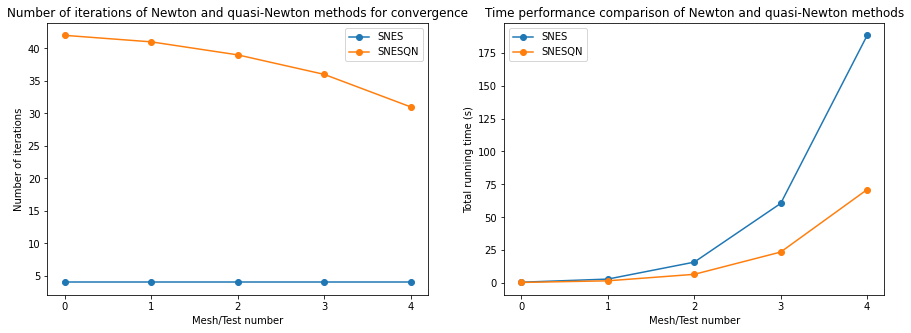

In [11]:
fig, ax = plt.subplots(1, 2 ,figsize=(15, 5))

ax[0].set_title("Number of iterations of Newton and quasi-Newton methods for convergence")
ax[0].set_ylabel("Number of iterations")
ax[0].plot(range(5), results['niters SNES'], "-o", label='SNES')
ax[0].plot(range(5), results['niters SNESQN'], "-o", label='SNESQN')

ax[1].set_title("Time performance comparison of Newton and quasi-Newton methods")
ax[1].set_ylabel("Total running time (s)")
ax[1].plot(range(5), results['time SNES'], "-o", label='SNES')
ax[1].plot(range(5), results['time SNESQN'], "-o", label='SNESQN')

tests = range(5)
for i in range(2):
    ax[i].set_xlabel("Mesh/Test number")
    ax[i].legend()
    ax[i].set_xticks(tests)

# plt.savefig("img/SNES_vs_SNESQN.png", dpi=300)

### Patches size

In the case of von Mises material and SNESQN solver

In [5]:
alpha = 0
DruckerPrager = crm.DruckerPrager(sig0, alpha, H)
material_DP = crm.Material(crm.IsotropicElasticity(E, nu), DruckerPrager)

In [ ]:
# patch_sizes = [1, 3 , 5, 10, 100, 207]
patch_sizes = [1, 3, 5, 10, 20, 30, 40, 50, 80, 100, 207]
# patch_sizes = [100, 207]
time_coarse_mesh = []
for size in patch_sizes:
    logger_file.log(pf.LOG_INFO_STAR, f'patch size = {size}')
    plasticity_convex = pf.ConvexPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name="mesh/thick_cylinder_coarse.msh", patch_size=size)
    _, _, T, _, _, _ = plasticity_convex.solve()
    time_coarse_mesh.append(T)

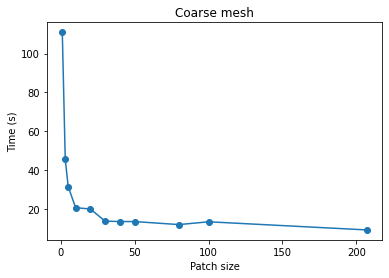

In [7]:
plt.xlabel("Patch size")
plt.ylabel("Time (s)")
plt.title('Coarse mesh')
plt.plot(patch_sizes, time_coarse_mesh, "-o")
plt.savefig("img/patch_sizes_coarse.png")

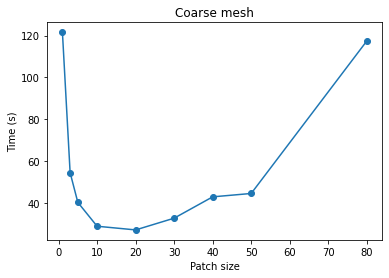

In [ ]:
plt.xlabel("Patch size")
plt.ylabel("Time (s)")
plt.title('Coarse mesh')
plt.plot(patch_sizes, time_coarse_mesh, "-o")
plt.savefig("img/patch_sizes_coarse.png")

In [ ]:
patch_sizes = [1, 3, 5, 10, 20, 30, 40, 50, 80]
time_medium_mesh = []
for size in patch_sizes:
    logger_file.log(pf.LOG_INFO_STAR, f'patch size = {size}')
    plasticity_convex = pf.ConvexPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name="thick_cylinder.msh", patch_size=size)
    _, _, T, _, _, _ = plasticity_convex.solve()
    time_medium_mesh.append(T)

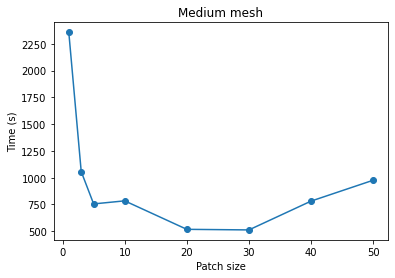

In [ ]:
plt.xlabel("Patch size")
plt.ylabel("Time (s)")
plt.title('Medium mesh')
plt.plot(patch_sizes[:-1], time_medium_mesh, "-o")
plt.savefig("img/patch_sizes_medium.png")

In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(40,5))
# for i, alpha in enumerate(alphas):
#     ax[i].set_title(r'$\alpha = $' + str(alpha))
#     ax[i].plot(results_SNES_list[i][:, 0], results_SNES_list[i][:, 1], "-o", label='SNES')
#     ax[i].plot(results_convex_list[i][:, 0], results_convex_list[i][:, 1], "-o", label='convex')
#     ax[i].set_xlabel("Patch size")
#     ax[i].set_ylabel("Time (s)")

### Analysis of convex plasticity approach

In [14]:
import cvxpy
cvxpy.__version__

'1.2.2'

In [ ]:
# MESH DATA
# coarse: 50 nodes (global), 69 cells (global), 207 quadrature_points (global)
# medium: 407 nodes (global), 714 cells (global), 2142 quadrature_points (Q2 space) 
# 811 nodes (global), 1478 cells (global), 4434 quadrature_points (global)
# 2121 nodes (global), 4240 cells (global),  quadrature_points (global)
print(407/50, 714/69, 2142/207)
print(811/407, 1478/714, 4434/2142)
print(2121/811, 4240/1478)

8.14 10.347826086956522 10.347826086956522
1.9926289926289926 2.070028011204482 2.070028011204482
2.615289765721332 2.8687415426251692


#### Coarse mesh

In [ ]:
conic_solvers = ['SCS', 'ECOS', 'MOSEK']
conic_solvers = ['MOSEK']

patch_sizes = [1, 5, 10, 20, 30, 40, 50, 100, 150, 207]
patch_sizes = [40, 50, 100, 150, 207]

time_coarse_mesh = []
for conic_solver in conic_solvers:
    time = []
    for size in patch_sizes:
        logger_file.log(pf.LOG_INFO_STAR, f'conic solver = {conic_solver}, patch size = {size}')
        plasticity_convex = pf.ConvexPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name="thick_cylinder_coarse.msh", patch_size=size, conic_solver=conic_solver)
        _, _, T, _, _, _ = plasticity_convex.solve()
        time.append(T)
    time_coarse_mesh.append(time)

In [14]:
patch_sizes_MOSEK_coarse = [40, 100, 150, 207]
MOSEK_compile_coarse = np.array([0.41 - 0.31, 0.37 - 0.19, 0.34 - 0.15, 0.45 - 0.13])
MOSEK_coarse = [58.45, 22.84, 19.86, 15.67]

patch_sizes_coarse = [1, 5, 10, 20, 30, 40, 50, 100, 150, 207]

ECOS_compile_coarse = np.array([0, 0.33 - 0.27, 0.25 - 0.18, 0.23 - 0.16, 0.21 - 0.15, 0.2 - 0.14, 0.21 - 0.15, 0.24 - 0.13, 0.35 - 0.15, 0.38 - 0.12])
ECOS_coarse = [127.61, 32.85, 20.87, 16.49, 15.15, 16, 16.13, 14.93, 15.22, 14.59]

SCS_compile_coarse = np.array([0.93 - 0.85, 0.22 - 0.20, 0.18 - 0.13, 0.19 - 0.13, 0.15 - 0.09, 0.13 - 0.09, 0.14 - 0.09, 0.19 - 0.09, 0.29 - 0.09, 0.38 - 0.06])
SCS_coarse = [116.28, 33.97, 22.78, 22.33, 14.45, 14.71, 13.52, 13.05, 9.79, 10.12]

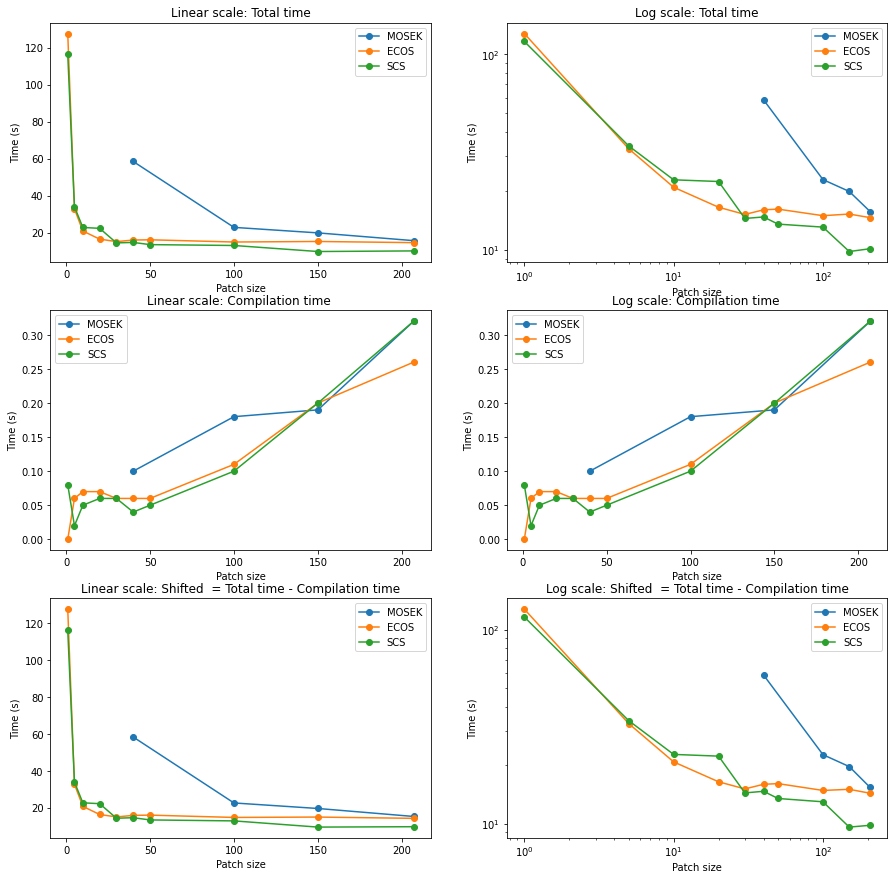

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

# fig.suptitle('Coarse mesh')

ax[0][0].set_title('Linear scale: Total time')
ax[0][0].plot(patch_sizes_MOSEK_coarse, MOSEK_coarse, "-o", label='MOSEK')
ax[0][0].plot(patch_sizes_coarse, ECOS_coarse, "-o", label='ECOS')
ax[0][0].plot(patch_sizes_coarse, SCS_coarse, "-o", label='SCS')

ax[1][0].set_title('Linear scale: Compilation time ')
ax[1][0].plot(patch_sizes_MOSEK_coarse, MOSEK_compile_coarse, "-o", label='MOSEK')
ax[1][0].plot(patch_sizes_coarse, ECOS_compile_coarse, "-o", label='ECOS')
ax[1][0].plot(patch_sizes_coarse, SCS_compile_coarse, "-o", label='SCS')

ax[2][0].set_title('Linear scale: Shifted  = Total time - Compilation time')
ax[2][0].plot(patch_sizes_MOSEK_coarse, MOSEK_coarse - MOSEK_compile_coarse, "-o", label='MOSEK')
ax[2][0].plot(patch_sizes_coarse, ECOS_coarse - ECOS_compile_coarse, "-o", label='ECOS')
ax[2][0].plot(patch_sizes_coarse, SCS_coarse - SCS_compile_coarse, "-o", label='SCS')

ax[0][1].set_title('Log scale: Total time')
ax[0][1].loglog(patch_sizes_MOSEK_coarse, MOSEK_coarse, "-o", label='MOSEK')
ax[0][1].loglog(patch_sizes_coarse, ECOS_coarse, "-o", label='ECOS')
ax[0][1].loglog(patch_sizes_coarse, SCS_coarse, "-o", label='SCS')

ax[1][1].set_title('Log scale: Compilation time ')
ax[1][1].plot(patch_sizes_MOSEK_coarse, MOSEK_compile_coarse, "-o", label='MOSEK')
ax[1][1].plot(patch_sizes_coarse, ECOS_compile_coarse, "-o", label='ECOS')
ax[1][1].plot(patch_sizes_coarse, SCS_compile_coarse, "-o", label='SCS')

ax[2][1].set_title('Log scale: Shifted  = Total time - Compilation time')
ax[2][1].loglog(patch_sizes_MOSEK_coarse, MOSEK_coarse - MOSEK_compile_coarse, "-o", label='MOSEK')
ax[2][1].loglog(patch_sizes_coarse, ECOS_coarse - ECOS_compile_coarse, "-o", label='ECOS')
ax[2][1].loglog(patch_sizes_coarse, SCS_coarse - SCS_compile_coarse, "-o", label='SCS')

for i in range(3):
    for j in range(2):
        ax[i][j].legend()
        ax[i][j].set_xlabel("Patch size")
        ax[i][j].set_ylabel("Time (s)")

plt.savefig("img/conic_solvers_coarse.png")
# fig.tight_layout()

#### Medium mesh

In [ ]:
conic_solvers = ['ECOS', 'MOSEK']
patch_sizes = [5, 11, 50, 100, 500, 1000, 1500, 2000, 2142]
patch_sizes = [2]

time_coarse_mesh = []
for conic_solver in conic_solvers:
    time = []
    for size in patch_sizes:
        logger_file.log(pf.LOG_INFO_STAR, f'conic solver = {conic_solver}, patch size = {size}')
        plasticity_convex = pf.ConvexPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name="mesh/thick_cylinder_medium.msh", patch_size=size, conic_solver=conic_solver)
        _, _, T, _, _, _ = plasticity_convex.solve()
        time.append(T)
    time_coarse_mesh.append(time)

In [10]:
patch_sizes_medium = [1, 5, 11, 50, 100, 500, 1000, 1500, 2000, 2142]

SCS_compile_medium = np.array([0, 0, 0, 0, 0, 3.18-0.43, 17.24-0.53, 55.71-0.37, 130.40-0.7, 137.33-0.54])
SCS_medium = [1051.34, 272.41, 193.5, 100.77, 92.66, 89.74, 111.77, 136.78, 227.48, 215.9]

patch_sizes_ECOS_medium = [2, 5, 11, 50, 100, 500, 1000, 1500, 2000, 2142]
ECOS_compile_medium = np.array([0, 0, 0, 0, 1.5-0.96, 4.66-1.07, 15.83-1.09, 46.38-1.37, 104.22-1.6, 125.02-1.7])
ECOS_medium = [615.54, 271.98, 169.61, 115.65, 102.52, 117.64, 148.91, 180.93, 258.4, 301.06]

patch_sizes_MOSEK_medium = [2, 5, 11, 51, 100, 500, 1000, 1500, 2000, 2142]
MOSEK_compile_medium = np.array([0, 0, 0, 2.1-1.85, 1.86-1.4, 6.26-0.97, 20.89-0.92, 60.21-0.87, 121.66-0.88, 142.2-0.9])
MOSEK_medium = [2947.84, 1381.5, 642.78, 251.81, 167.92, 127.39, 127.78, 161.14, 223.38, 239.37]

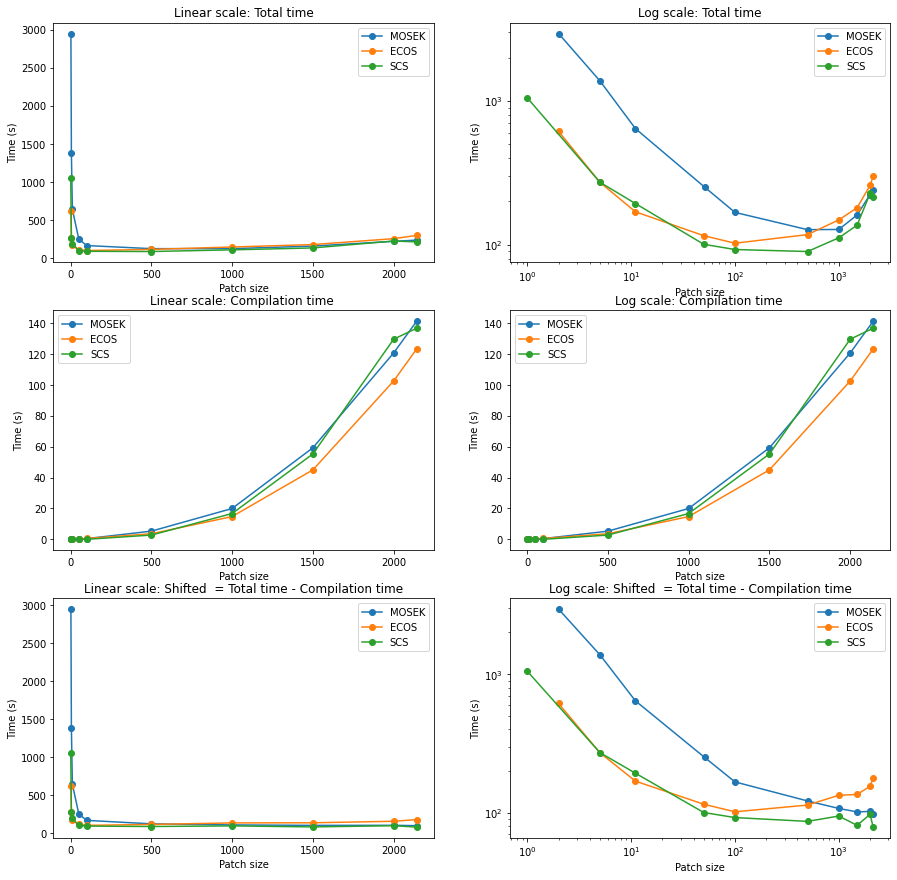

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

# fig.suptitle('Medium mesh')

ax[0][0].set_title('Linear scale: Total time')
ax[0][0].plot(patch_sizes_MOSEK_medium, MOSEK_medium, "-o", label='MOSEK')
ax[0][0].plot(patch_sizes_ECOS_medium, ECOS_medium, "-o", label='ECOS')
ax[0][0].plot(patch_sizes_medium, SCS_medium, "-o", label='SCS')

ax[1][0].set_title('Linear scale: Compilation time ')
ax[1][0].plot(patch_sizes_MOSEK_medium, MOSEK_compile_medium, "-o", label='MOSEK')
ax[1][0].plot(patch_sizes_ECOS_medium, ECOS_compile_medium, "-o", label='ECOS')
ax[1][0].plot(patch_sizes_medium, SCS_compile_medium, "-o", label='SCS')

ax[2][0].set_title('Linear scale: Shifted  = Total time - Compilation time')
ax[2][0].plot(patch_sizes_MOSEK_medium, MOSEK_medium - MOSEK_compile_medium, "-o", label='MOSEK')
ax[2][0].plot(patch_sizes_ECOS_medium, ECOS_medium - ECOS_compile_medium, "-o", label='ECOS')
ax[2][0].plot(patch_sizes_medium, SCS_medium - SCS_compile_medium, "-o", label='SCS')

ax[0][1].set_title('Log scale: Total time')
ax[0][1].loglog(patch_sizes_MOSEK_medium, MOSEK_medium, "-o", label='MOSEK')
ax[0][1].loglog(patch_sizes_ECOS_medium, ECOS_medium, "-o", label='ECOS')
ax[0][1].loglog(patch_sizes_medium, SCS_medium, "-o", label='SCS')

ax[1][1].set_title('Log scale: Compilation time ')
ax[1][1].plot(patch_sizes_MOSEK_medium, MOSEK_compile_medium, "-o", label='MOSEK')
ax[1][1].plot(patch_sizes_ECOS_medium, ECOS_compile_medium, "-o", label='ECOS')
ax[1][1].plot(patch_sizes_medium, SCS_compile_medium, "-o", label='SCS')

ax[2][1].set_title('Log scale: Shifted  = Total time - Compilation time')
ax[2][1].loglog(patch_sizes_MOSEK_medium, MOSEK_medium - MOSEK_compile_medium, "-o", label='MOSEK')
ax[2][1].loglog(patch_sizes_ECOS_medium, ECOS_medium - ECOS_compile_medium, "-o", label='ECOS')
ax[2][1].loglog(patch_sizes_medium, SCS_medium - SCS_compile_medium, "-o", label='SCS')

for i in range(3):
    for j in range(2):
        ax[i][j].legend()
        ax[i][j].set_xlabel("Patch size")
        ax[i][j].set_ylabel("Time (s)")

plt.savefig("img/conic_solvers_medium.png", dpi=300)
# fig.tight_layout()

#### Main mesh

In [13]:
# plt.xlabel("Patch size")
# plt.ylabel("Time (s)")
# plt.title('Coarse mesh')
# for i, solver in enumerate(conic_solvers):
#     plt.plot(patch_sizes, time_coarse_mesh[i], "-o", label=solver)
# plt.legend()
# plt.savefig("img/conic_solvers_coarse_tmp.png")

In [ ]:
patch_sizes = [11, 50, 100, 500, 1000, 1500, 2000, 2500]
patch_sizes = [6] 

conic_solvers = ['MOSEK']

time_medium_mesh = []
for conic_solver in conic_solvers:
    time = []
    for size in patch_sizes:
        logger_file.log(pf.LOG_INFO_STAR, f'conic solver = {conic_solver}, patch size = {size}')
        plasticity_convex = pf.ConvexPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name="thick_cylinder.msh", patch_size=size, conic_solver=conic_solver, tol_conic_solver=1e-13)
        _, _, T, _, _, _ = plasticity_convex.solve()
        time.append(T)
        
    time_medium_mesh.append(time)

In [5]:
# # for patch_sizes = [?]
# SCS = [2123.34, 872.57, 640.29, 631.30, 481.87, 510.34, 829.08, 1000.69, 2770.39]

# # for patch_sizes = [250, 260, 270, 280, 290, 300]
# ECOS = [418.4926564693451, 406.2975263595581, 414.91892194747925, 436.04598736763, 396.418080329895, 499.7069659233093]

# # for patch_sizes = [2, 5, 10, 50, 100, 200, 250]
# MOSEK = [6490.76, 2741.61, 1494.32, 596.93, 464.96, 365.15]
# ECOS = [1582.5732097625732, 746.9019536972046, 553.5608420372009, 456.00735425949097, 377.7423219680786, 455.44888043403625, 480.2371971607208]
# SCS = [1274.89, 723.58, 716.88, 1079.78, 4432.63]

patch_sizes_MOSEK_dense = [11, 100, 500, 1000, 1500, 2000, 2500]
MOSEK_compile_dense = np.array([11.23 - 11.18, 2.45 - 2.17, 5.18 - 1.37, 17.99 - 1.47, 83.59 - 1.35, 103.33 - 1.26, 275.50 - 1.33])
MOSEK_dense = [1200.69, 257.5, 185.26, 181.99, 238.70, 263.59, 431.19]

patch_sizes_dense = [5, 11, 50, 100, 500, 1000, 1500, 2000, 2500]

ECOS_compile_dense = np.array([5.38 - 5.29, 3.59 - 3.45, 2.38 - 2.02, 2.27 - 1.91, 9.18 - 2.13, 20.11 - 2.43, 92.29 - 2.79, 132.25 - 3.92, 312.07 - 3.6])
ECOS_dense = [589.41, 346.44, 252.14, 202.98, 247.08, 307.42, 384.73, 553.61, 765.58]

SCS_compile_dense = np.array([4.43 - 4.16, 0 , 1.14 - 0.99, 0.74 - 0.67, 8.37 - 0.70, 19.99 - 0.91, 89.15 - 0.84, 147.86 - 1.71, 316.31 - 1.43])
SCS_dense = [611.43, 396.41, 227.36, 199, 207.03, 244.74, 281.36, 396.25, 502.30]

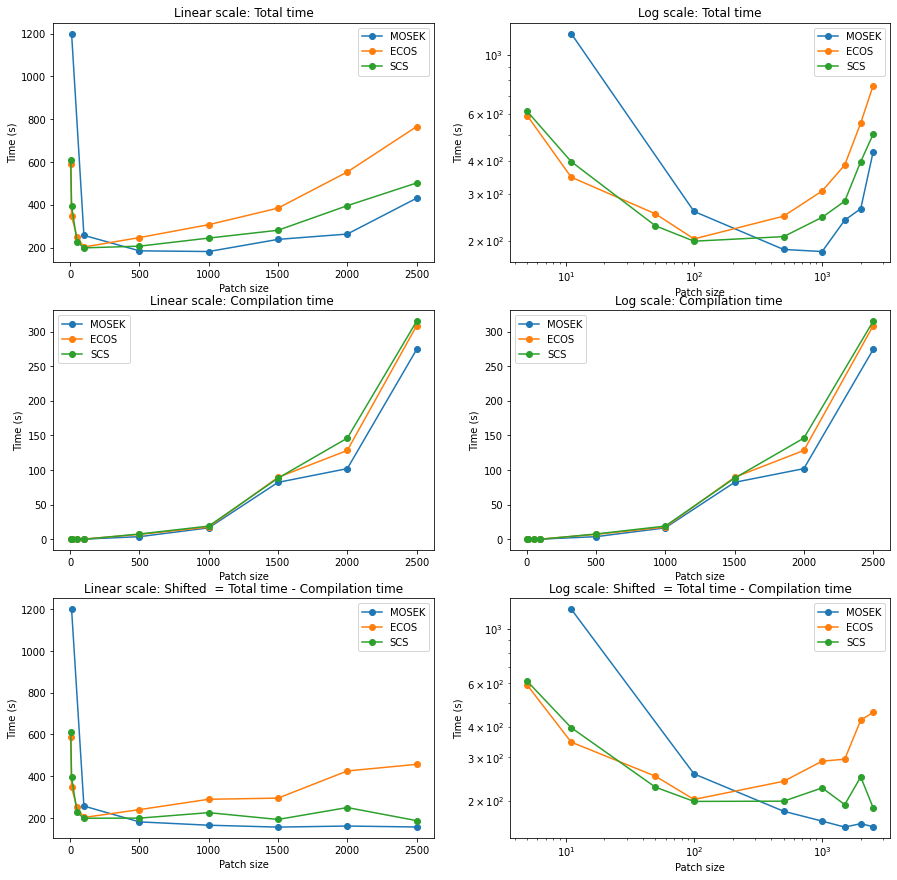

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

# fig.suptitle('Medium mesh')

ax[0][0].set_title('Linear scale: Total time')
ax[0][0].plot(patch_sizes_MOSEK_dense, MOSEK_dense, "-o", label='MOSEK')
ax[0][0].plot(patch_sizes_dense, ECOS_dense, "-o", label='ECOS')
ax[0][0].plot(patch_sizes_dense, SCS_dense, "-o", label='SCS')

ax[1][0].set_title('Linear scale: Compilation time ')
ax[1][0].plot(patch_sizes_MOSEK_dense, MOSEK_compile_dense, "-o", label='MOSEK')
ax[1][0].plot(patch_sizes_dense, ECOS_compile_dense, "-o", label='ECOS')
ax[1][0].plot(patch_sizes_dense, SCS_compile_dense, "-o", label='SCS')

ax[2][0].set_title('Linear scale: Shifted  = Total time - Compilation time')
ax[2][0].plot(patch_sizes_MOSEK_dense, MOSEK_dense - MOSEK_compile_dense, "-o", label='MOSEK')
ax[2][0].plot(patch_sizes_dense, ECOS_dense - ECOS_compile_dense, "-o", label='ECOS')
ax[2][0].plot(patch_sizes_dense, SCS_dense - SCS_compile_dense, "-o", label='SCS')

ax[0][1].set_title('Log scale: Total time')
ax[0][1].loglog(patch_sizes_MOSEK_dense, MOSEK_dense, "-o", label='MOSEK')
ax[0][1].loglog(patch_sizes_dense, ECOS_dense, "-o", label='ECOS')
ax[0][1].loglog(patch_sizes_dense, SCS_dense, "-o", label='SCS')

ax[1][1].set_title('Log scale: Compilation time ')
ax[1][1].plot(patch_sizes_MOSEK_dense, MOSEK_compile_dense, "-o", label='MOSEK')
ax[1][1].plot(patch_sizes_dense, ECOS_compile_dense, "-o", label='ECOS')
ax[1][1].plot(patch_sizes_dense, SCS_compile_dense, "-o", label='SCS')

ax[2][1].set_title('Log scale: Shifted  = Total time - Compilation time')
ax[2][1].loglog(patch_sizes_MOSEK_dense, MOSEK_dense - MOSEK_compile_dense, "-o", label='MOSEK')
ax[2][1].loglog(patch_sizes_dense, ECOS_dense - ECOS_compile_dense, "-o", label='ECOS')
ax[2][1].loglog(patch_sizes_dense, SCS_dense - SCS_compile_dense, "-o", label='SCS')

for i in range(3):
    for j in range(2):
        ax[i][j].legend()
        ax[i][j].set_xlabel("Patch size")
        ax[i][j].set_ylabel("Time (s)")

plt.savefig("img/conic_solvers.png", dpi=300)
# fig.tight_layout()

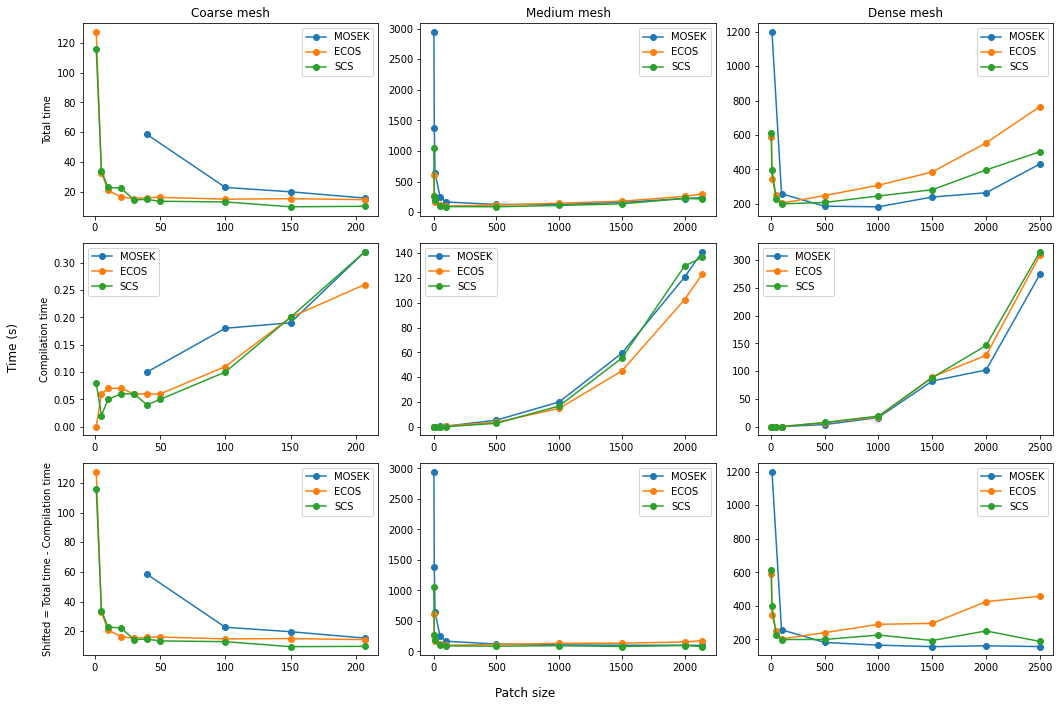

In [47]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

# ax[0][0].set_title('Total time')
ax[0][0].plot(patch_sizes_MOSEK_coarse, MOSEK_coarse, "-o", label='MOSEK')
ax[0][0].plot(patch_sizes_coarse, ECOS_coarse, "-o", label='ECOS')
ax[0][0].plot(patch_sizes_coarse, SCS_coarse, "-o", label='SCS')

# ax[1][0].set_title('Compilation time ')
ax[1][0].plot(patch_sizes_MOSEK_coarse, MOSEK_compile_coarse, "-o", label='MOSEK')
ax[1][0].plot(patch_sizes_coarse, ECOS_compile_coarse, "-o", label='ECOS')
ax[1][0].plot(patch_sizes_coarse, SCS_compile_coarse, "-o", label='SCS')

# ax[2][0].set_title('Shifted  = Total time - Compilation time')
ax[2][0].plot(patch_sizes_MOSEK_coarse, MOSEK_coarse - MOSEK_compile_coarse, "-o", label='MOSEK')
ax[2][0].plot(patch_sizes_coarse, ECOS_coarse - ECOS_compile_coarse, "-o", label='ECOS')
ax[2][0].plot(patch_sizes_coarse, SCS_coarse - SCS_compile_coarse, "-o", label='SCS')

# ax[0][1].set_title('Total time')
ax[0][1].plot(patch_sizes_MOSEK_medium, MOSEK_medium, "-o", label='MOSEK')
ax[0][1].plot(patch_sizes_medium, ECOS_medium, "-o", label='ECOS')
ax[0][1].plot(patch_sizes_medium, SCS_medium, "-o", label='SCS')

# ax[1][1].set_title('Compilation time ')
ax[1][1].plot(patch_sizes_MOSEK_medium, MOSEK_compile_medium, "-o", label='MOSEK')
ax[1][1].plot(patch_sizes_medium, ECOS_compile_medium, "-o", label='ECOS')
ax[1][1].plot(patch_sizes_medium, SCS_compile_medium, "-o", label='SCS')

# ax[2][1].set_title('Shifted  = Total time - Compilation time')
ax[2][1].plot(patch_sizes_MOSEK_medium, MOSEK_medium - MOSEK_compile_medium, "-o", label='MOSEK')
ax[2][1].plot(patch_sizes_medium, ECOS_medium - ECOS_compile_medium, "-o", label='ECOS')
ax[2][1].plot(patch_sizes_medium, SCS_medium - SCS_compile_medium, "-o", label='SCS')

# ax[0][2].set_title('Total time')
ax[0][2].plot(patch_sizes_MOSEK_dense, MOSEK_dense, "-o", label='MOSEK')
ax[0][2].plot(patch_sizes_dense, ECOS_dense, "-o", label='ECOS')
ax[0][2].plot(patch_sizes_dense, SCS_dense, "-o", label='SCS')

# ax[1][2].set_title('Compilation time ')
ax[1][2].plot(patch_sizes_MOSEK_dense, MOSEK_compile_dense, "-o", label='MOSEK')
ax[1][2].plot(patch_sizes_dense, ECOS_compile_dense, "-o", label='ECOS')
ax[1][2].plot(patch_sizes_dense, SCS_compile_dense, "-o", label='SCS')

# ax[2][2].set_title('Shifted  = Total time - Compilation time')
ax[2][2].plot(patch_sizes_MOSEK_dense, MOSEK_dense - MOSEK_compile_dense, "-o", label='MOSEK')
ax[2][2].plot(patch_sizes_dense, ECOS_dense - ECOS_compile_dense, "-o", label='ECOS')
ax[2][2].plot(patch_sizes_dense, SCS_dense - SCS_compile_dense, "-o", label='SCS')

ax[0][0].set_title('Coarse mesh')
ax[0][1].set_title('Medium mesh')
ax[0][2].set_title('Dense mesh')

ax[0][0].set_ylabel('Total time')
ax[1][0].set_ylabel('Compilation time')
ax[2][0].set_ylabel('Shifted = Total time - Compilation time')

for i in range(3):
    for j in range(3):
        ax[i][j].legend()
        # ax[i][j].set_xlabel("Patch size")
        # ax[i][j].set_ylabel("Time (s)")

# handles, labels = ax[0][0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

fig.supxlabel('Patch size')
fig.supylabel('Time (s)')
fig.tight_layout()
fig.subplots_adjust(left=0.09, top=0.95)
plt.savefig("img/conic_solvers_2.png", dpi=300)

## Calculation time for different approaches and solvers (for von Mises yield criterion)

### Classical approach vs Convex approach for a custom Newton solver

In [5]:
mesh = 'thick_cylinder_coarse.msh'
patch_size = 10
conic_solver = 'SCS'
solver = 'SNESQN'

# logger_file.log(pf.LOG_INFO_STAR, f'Newton solver = {solver}, conic solver = {conic_solver}, patch size = {patch_size}, mesh = {mesh}')
plasticity_convex = pf.ConvexAnalyticalPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name=mesh, patch_size=patch_size, conic_solver=conic_solver, tol_conic_solver=1e-13)
_, result, T, _, _, _ = plasticity_convex.solve()

Level 25:analysis_file:rank#0: mesh = thick_cylinder_coarse.msh
Level 25:analysis_file:rank#0: mesh info: 50 nodes (global), 69 cells (global), 207 quadrature_points (Q2 space) (global)
Level 25:analysis_file:rank#0: mesh info: 50 nodes (local), 69 cells (local), 207 quadrature_points (Q2 space) (local)
Level 25:analysis_file:rank#0: Newton solver = SNESQN, conic solver = SCS, patch size = 10
Level 25:analysis_file:rank#0: Step: 1, Iterations = 1, Time = 0.35 (s)
Level 25:analysis_file:rank#0: Step: 2, Iterations = 1, Time = 0.21 (s)
Level 25:analysis_file:rank#0: Step: 3, Iterations = 1, Time = 0.19 (s)
Level 25:analysis_file:rank#0: Step: 4, Iterations = 1, Time = 0.19 (s)
Level 25:analysis_file:rank#0: Step: 5, Iterations = 1, Time = 0.18 (s)
Level 25:analysis_file:rank#0: Step: 6, Iterations = 1, Time = 0.19 (s)
Level 25:analysis_file:rank#0: Step: 7, Iterations = 1, Time = 0.20 (s)
Level 25:analysis_file:rank#0: Step: 8, Iterations = 1, Time = 0.19 (s)
Level 25:analysis_file:rank#

In [ ]:
solvers = ['nonlinear', 'SNESQN']
meshes = ['thick_cylinder_coarse.msh', 'thick_cylinder.msh']

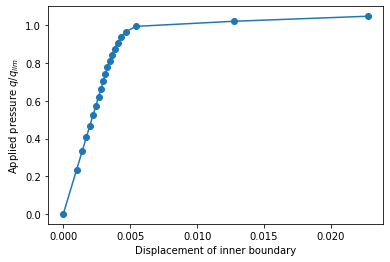

In [11]:
plot_dsiplacement(result)

In [7]:
mesh = 'thick_cylinder.msh'

logger_file.log(pf.LOG_INFO_STAR, f'Newton solver = {solver}, conic solver = {conic_solver}, patch size = {patch_size}, mesh = {mesh}')
plasticity_convex = pf.ConvexAnalyticalPlasticity(material_DP, logger=logger_file,  solver='SNESQN', mesh_name=mesh, patch_size=patch_size, conic_solver=conic_solver, tol_conic_solver=1e-13)
_, _, T, _, _, _ = plasticity_convex.solve()

NameError: name 'solver' is not defined

### Difference between custom Newton solver and SNESQN solver

### Classical (with interpolation) approach vs Custom assembling 

## Tests

In [6]:
conic_solvers = ['SCS']
patch_sizes = [100, 2000]
patch_sizes = [2000]

time_coarse_mesh = []
for conic_solver in conic_solvers:
    time = []
    for size in patch_sizes:
        logger_file.log(pf.LOG_INFO_STAR, f'conic solver = {conic_solver}, patch size = {size}')
        plasticity_convex = pf.ConvexPlasticity(
            material=material_DP, 
            logger=logger_file, 
            solver='SNESQN', 
            mesh_name="../mesh/thick_cylinder_medium.msh", 
            patch_size=size, 
            conic_solver=conic_solver
        )
        _, _, T, _, _, _, niters = plasticity_convex.solve()
        time.append(T)
    time_coarse_mesh.append(time)

Level 25:log_file:conic solver = SCS, patch size = 2000
Level 25:log_file:rank#0: mesh = ../mesh/thick_cylinder_medium.msh
Level 25:log_file:rank#0: mesh info: 407 nodes (global), 714 cells (global), 2142 quadrature_points (Q2 space) (global)
Level 25:log_file:rank#0: mesh info: 407 nodes (local), 714 cells (local), 2142 quadrature_points (Q2 space) (local)
Level 25:log_file:rank#0: Newton solver = SNESQN, conic solver = SCS, patch size = 2000


: 

: 